<a href="https://colab.research.google.com/github/daniel199316/ModeladoYsimulacion/blob/master/PROYECTO_FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**ANALISIS DE BIFURCACIONES DE LA ECUACION DE CHEN´S**
El anticontrol del caos al hacer un sistema no caótico caótico ha llevado al descubrimiento de algunos nuevos sistemas
caóticos, particularmente la ecuación de Chen autónoma tridimensional de tiempo continuo con solo dos términos cuadráticos.
Este artículo investiga más a fondo algunas propiedades dinámicas básicas y varias bifurcaciones de la ecuación de Chen,
revelando así sus diferentes características de algunos otros modelos caóticos como su origen, el sistema Lorenz.

**1. INTRODUCCION**

---


En las últimas dos décadas, el caos en los sistemas de ingeniería,
como los circuitos no lineales, ha pasado gradualmente de ser
simplemente un fenómeno curioso a uno con importancia práctica y
aplicaciones. Se encuentra que el caos es útil o tiene un gran potencial
en muchas disciplinas, como la mezcla completa de líquidos con bajo
consumo de energía, diseño de circuitos de alto rendimiento para
telecomunicaciones, prevención de colapso de sistemas de energía,
aplicaciones de ingeniería biomédica para el cerebro y el corazón
humano, por nombrar solo unos pocos [Chen, 1999; Chen y Dong,
1998].

Crear caos, por lo tanto, se convierte en un tema clave en tales
aplicaciones donde el caos es importante y útil. Dado un sistema o
proceso, que puede ser lineal o no lineal pero originalmente no es
caótico o incluso estable, la cuestión de si uno puede o no generar
caos (y, de ser así, cómo) mediante el diseño de un controlador simple
e implementable (por ejemplo, un sintonizador de parámetros o un
controlador de retroalimentación de estado) se conoce como anticontrol
del caos o chaoti fi cación. Este problema es teóricamente atractivo y
técnicamente muy desafiante, como se puede imaginar a partir de
Comportamiento complicado del caos y su asociación con varias
bifurcaciones.



Considere la ecuación de Lorenz controlada:

**dx/dt = sigma(y - X)**

**dy/dt = rho(x) - x(z) - y**

**dz/dt = x(y) - beta(z)**

Text(0.5, 0.92, 'SIN PARAMETRO DE ANTICONTROL')

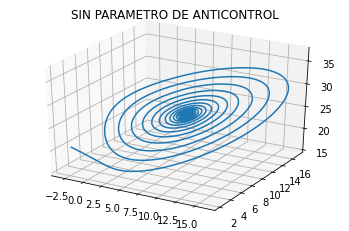

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

#SIN PARAMETRO DE ANTICONTROL

def Lorenz_equation(t,xyz,sigma,beta,rho):
  x, y, z = xyz
  return[sigma*(y-x), x*(rho-z)-y, x*y-beta*z]

def event_lorenz(t,xyz,sigma,beta,rho):
  x, y, z = xyz
  return x + y

sigma, beta, rho = 35,8/3,28
tend= 30
val_ini=[-3,3,20]
t = np.linspace(0,tend,10000)


sol_leq = solve_ivp(Lorenz_equation,[0,tend],val_ini,args=(sigma,beta,rho),t_eval=t, events = event_lorenz)


ax = plt.axes(projection='3d')
ax.plot3D(sol_leq.y[0],sol_leq.y[1],sol_leq.y[2])

plt.title('SIN PARAMETRO DE ANTICONTROL')
#fig, (ax1) = plt.subplots(1, sharex=True)
#ax1=plt.plot(sol_leq.t,sol_leq.y[0])


**2. Anticontrol de la ecuación de Lorenz**

En esta sección, nos enfocamos en la creación de caos con técnicas
anticontrol. Tratamos de desestabilizar algunos equilibrios estables
existentes de un sistema no caótico mediante el uso de retroalimentación
de estado. Sin embargo, este método no siempre produce una situación
caótica; puede funcionar si los equilibrios tienen estructuras hiperbólicas
en un sistema globalmente acotado.

Considere la ecuación de Lorenz controlada:

**dx/dt = sigma(y - X)**

**dy/dt = rho(x) - x(z) - y + u**  ///      donde: u = -sigma(x) + (1 + rho)*y

**dz/dt = x(y) - beta(z)**




[8.48528137423857, 8.48528137423857, 27]
[-8.48528137423857, -8.48528137423857, 27]


Text(0.5, 0.92, 'GENERACION DE CAOS CON EL PARAMETRO u ANTICONTROL')

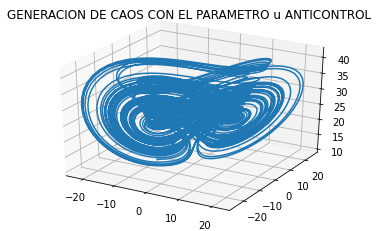

In [ ]:
#GENERACION DE CAOS CON EL PARAMETRO u ANTICONTROL

def Lorenz_equation1(t,xyz,sigma,beta,rho):
  x, y, z = xyz
  return[sigma*(y-x), x*(rho-z)-y-sigma*x +(1+rho)*y, x*y-beta*z]

tend=50
val_ini=[-3,3,20]
t = np.linspace(0,tend,10000)
sigma, beta, rho = 35,8/3,28
sol_leq1 = solve_ivp(Lorenz_equation1,[0,tend],val_ini,args=(sigma,beta,rho),t_eval=t, events = event_lorenz)


print([np.sqrt((rho-1)*beta),np.sqrt((rho-1)*beta),rho-1])
print([-np.sqrt((rho-1)*beta),-np.sqrt((rho-1)*beta),rho-1])

#GRAFICA CON PARAMETRO DE ANTICONTROL
fig, (ax2) = plt.subplots(1, sharex=True)
ax2 = plt.axes(projection='3d')
ax2.plot3D(sol_leq1.y[0],sol_leq1.y[1],sol_leq1.y[2])

plt.title('GENERACION DE CAOS CON EL PARAMETRO u ANTICONTROL')


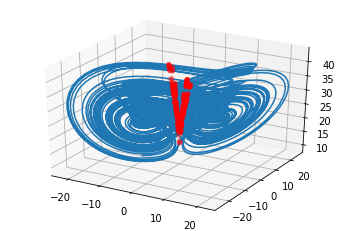

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(sol_leq1.y[0],sol_leq1.y[1],sol_leq1.y[2])
ax.scatter3D(sol_leq1.y_events[0][5:-1,0],sol_leq1.y_events[0][5:-1,1],sol_leq1.y_events[0][5:-1,2],".",color="red")
plt.show()

**Diagrama de bifurcaciones ecuacion de Lorenz sin parametro de anticontrol**

98.13092494010925


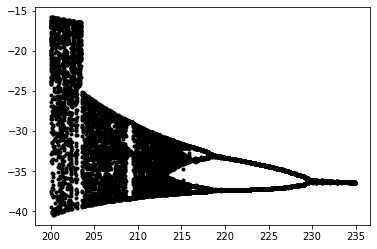

In [ ]:
 from time import time

event_lorenz.direction = -1
t = np.linspace(0,20,10000)
val_ini=[0.1,0.1,0.1]
tic = time()
for r in np.arange(200,235,0.1):
  sol_leq = solve_ivp(Lorenz_equation,[0,20],val_ini,args=(10,8/3,r),t_eval=t, events = event_lorenz,rtol=1e-4,atol=1e-7)
  for i in range(len(sol_leq.t_events[0])):
    if sol_leq.t_events[0][i] > 2:
      plt.plot(r,sol_leq.y_events[0][i,1],".",color="black")
  val_ini = sol_leq.y[:,-1]   

toc=time()
print(toc-tic)

**3. ECUACION DE CHEN**

**Caos y ciclos límite**.
 Muchas islas(ventanas) que dan soluciones periódicas están incrustadas en la región caótica. Cada isla está compuesta básicamente por un conjunto de curvas de bifurcación (T, Pf, Pd), como se ilustra en la figura siguente. Dicha figura muestra primero las respuestas del sistema cuando el parámetro **beta** cambia gradualmente desde la parte inferior a la parte superior a lo largo de la
línea a-e. 



La solución periódica, que se muestra en la figura (a) con beta = 1.25, es
generada por la bifurcación tangente T a través del caos intermitente.
Esta solución se divide en dos ciclos de límite estables después de cruzar la bifurcación de la horquilla Pf que es visible en la figura (b) con beta = 1.75.

Cada uno de ellos se bifurca a soluciones de período 2 cuando se cruza el Pd de bifurcación de duplicación de período 1,

figura (c) con beta = 2.25. Cuando estas soluciones se encuentran con Pd 2, Tenemos soluciones de período 4. A través de la cascada de duplicación del período, finalmente se convierte en un atractor caótico como se muestra en la figura (d) con beta = 2.5. Por lo tanto, existen dos atractores caóticos aislados en
el espacio de estado. Al cambiar aún más el valor de beta Se puede observar que estos atractores caóticos aislados se fusionan. 

El atractor se parece al atractor de Lorenz, ver figura (e) con beta = 2.75, es decir, hay dos espirales y la órbita tiende asintóticamente a alguna superficie bidimensional en el espacio de estado.

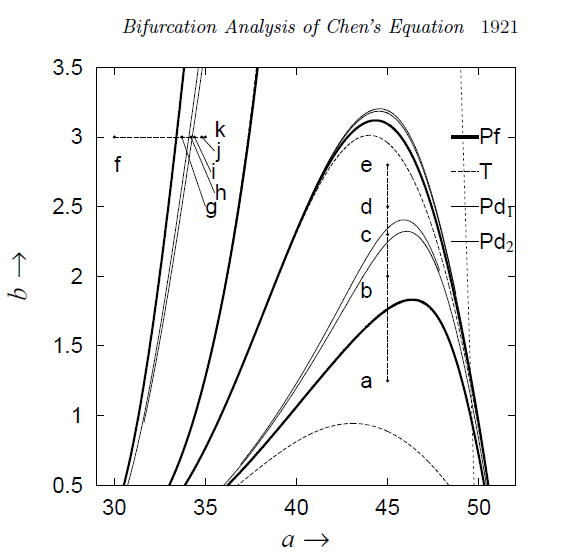

In [ ]:
Image("Captura.PNG",width=500)

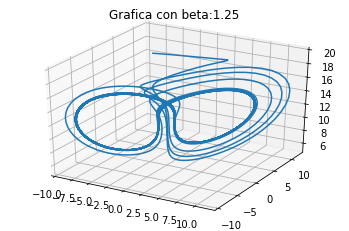

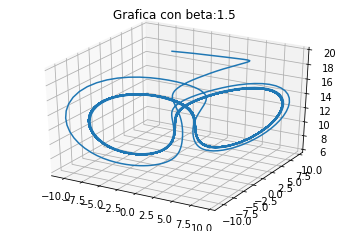

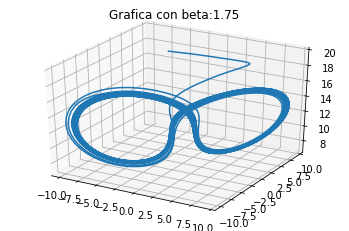

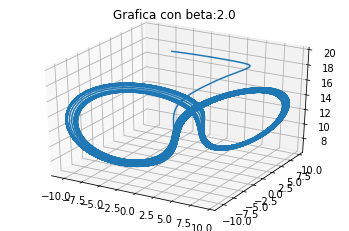

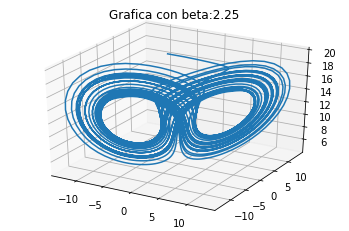

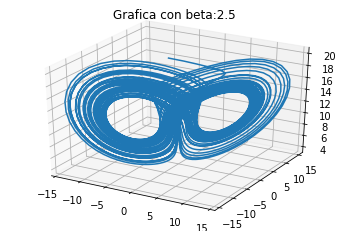

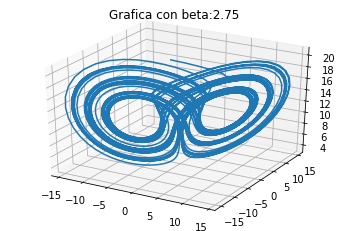

In [ ]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def Chens_equation(t,xyz,sigma,beta,rho):
  x, y, z = xyz
  return[sigma*(y-x), (rho-sigma)*x-x*z+rho*y, x*y-beta*z]

def event_Chens(t,xyz,sigma,beta,rho):
  x, y, z = xyz
  return x + y

val_ini=[-3,2,20]
tend= 50
#VARIAMOS RHO PARA GENERAR LOS DIFERENTES GRAFICOS EN LAS DIFERENTES ZONAS
sigma, beta, rho = 45, 3, 28
t = np.linspace(0,tend,5000)
figs={}
axs={}
for r in np.arange(1.25,3,0.25):
  sol_Ceq = solve_ivp(Chens_equation,[0,tend],val_ini,args=(sigma,r,rho),t_eval=t,events= event_Chens)
  figs[r]=plt.figure()
  axs[r]=figs[r].add_subplot(projection='3d')
  axs[r].plot(sol_Ceq.y[0],sol_Ceq.y[1],sol_Ceq.y[2])
  plt.title(f"Grafica con beta:{r}")



Las graficas anteriores son retratos de fase de atractores estables cuyos parámetros corresponden a la figura "Analisis de bifurcaciones de Chen" anteriormente propuesta.Hasta finalmente comportarse como un atractor caotico.



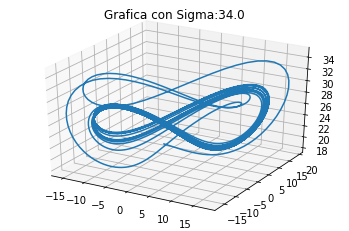

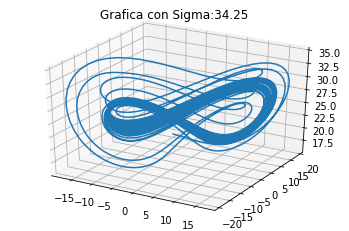

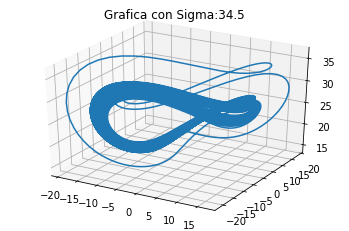

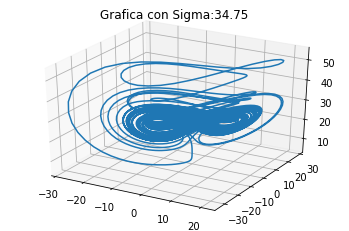

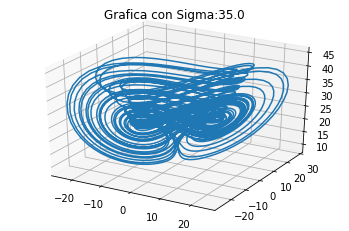

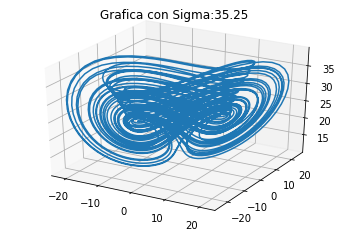

In [ ]:
t = np.linspace(0,30,5000)
for r in np.arange(34,35.5,0.25):
  sol_Ceq = solve_ivp(Chens_equation,[0,tend],val_ini,args=(r,beta,rho),t_eval=t,events= event_Chens)
  figs[r]=plt.figure()
  axs[r]=figs[r].add_subplot(projection='3d')
  axs[r].plot(sol_Ceq.y[0],sol_Ceq.y[1],sol_Ceq.y[2])
  plt.title(f"Grafica con Sigma:{r}")

En las graficas anteriores observamos que cambiando el parámetro Sigma a lo largo de la línea f-k, las figuras anteriores nos permiten ver el comportamiento que muestran los retratos de fase correspondientes.
Podemos ver el mismo escenario de bifurcación. Sin embargo, el
atractor caótico que se muestra en la ultima grafica es algo diferente de
un atractor de tipo Lorenz por su forma espiral sobre los dos
tornillos, que no tiene tendencia a moverse a ninguna superficie
bidimensional. 

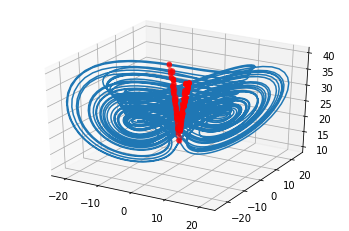

In [ ]:
ax = plt.axes(projection='3d')
ax.plot3D(sol_Ceq.y[0],sol_Ceq.y[1],sol_Ceq.y[2])
ax.scatter3D(sol_Ceq.y_events[0][5:-1,0],sol_Ceq.y_events[0][5:-1,1],sol_Ceq.y_events[0][5:-1,2],".",color="red")
plt.show()

48.24326705932617


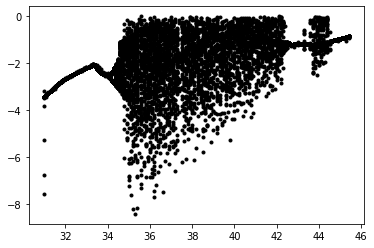

In [ ]:
from time import time

event_Chens.direction = -1
val_ini=[-3,2,20]
tic = time()
for r in np.arange(31,45.5,0.1):
  sol_Ceq = solve_ivp(Chens_equation,[0,tend],val_ini,args=(r,3,28),t_eval=t, events = event_Chens,rtol=1e-4,atol=1e-7)
  for i in range(len(sol_Ceq.t_events[0])):
    if sol_Ceq.t_events[0][i] > 0:
      plt.plot(r,sol_Ceq.y_events[0][i,1],".",color="black")
  val_ini = sol_Ceq.y[:,-1]   

toc=time()
print(toc-tic)

**CONCLUSIONES**



*   La grafica "Analisis de bifurcaciones de la ecuacion de Chen" me generar una idea grafica de como sera el comportamiento del sistema dependiendo de la zona en la que me encuentre, para entrar o salir de dichas zonas se deben de variar los parametros Sigama y beta, esto nos permitira tener orbitas con diferentes periodos o tambien llegar a generar caos en nuestro sistema.
*   Para generar un caos controlado en orbitas periodicas en el sistema de Lorenz se debe de generar un nuevo parametro llamado "Parametro de anticontrol".
Tambien nos enfocamos en la creación del caos con técnicas anticontrol. Tratamos de desestabilizar algunos equilibrios estables existentes de un sistema no caótico mediante el uso de retroalimentación estatal.

*   El caos se encuentra útil o tiene un gran potencial en muchas disciplinas tales como la mezcla completa de líquidos con bajo consumo de energía, circuito de alto rendimiento, diseños para telecomunicaciones, prevención de colapso de sistemas de potencia, aplicaciones de ingeniería biomédica funciones para el cerebro humano y el corazón, por nombrar solo unos pocos

*   El diagrama de bifurcaciones es sumamente util ya que de una manera grafica me permite entender para que valores de un paramtro el sistema tiene soluciones estables o inestables, ademas de saber como se comporta el periodo del sitema.
*  Este informe discute algunas propiedades matematicas básicas. El sistema de Chen tiene la misma complejidad que la ecuación de Lorenz: son ambos autónomos tridimensionales con solo dos términos cuadráticos, sin embargo, no son topológicamente equivalentes.





